In [9]:
# Importamos librerías
import heapq
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
# Grafo representado como un diccionario de diccionarios
grafo = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'D': 2, 'E': 5},
    'C': {'A': 4, 'F': 3},
    'D': {'B': 2, 'G': 2},
    'E': {'B': 5, 'G': 7},
    'F': {'C': 3, 'G': 4},
    'G': {'D': 2, 'E': 7, 'F': 4}
}

In [11]:
# Crear un grafo de NetworkX y agregar nodos y aristas
G = nx.Graph()
for nodo, vecinos in grafo.items():
    for vecino, peso in vecinos.items():
        G.add_edge(nodo, vecino, weight=peso)

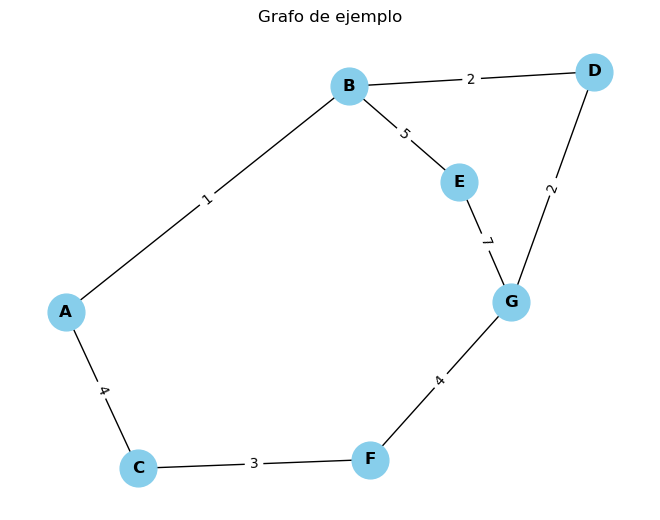

In [14]:
# Dibujar el grafo
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Grafo de ejemplo')
plt.show()

In [15]:
# Algoritmo de costo uniforme
def costo_uniforme(inicio, objetivo, grafo):
    cola_prioridad = []
    heapq.heappush(cola_prioridad, (0, inicio, [inicio]))  # Un heap es una estructura de datos 
                                                           # basada en un árbol binario
                                                           # heapq.heappush(heap, item): 
                                                           # Agrega un nuevo elemento al montón.
    visitados = set()
    
    while cola_prioridad:
        costo_actual, nodo_actual, camino = heapq.heappop(cola_prioridad)
                                                           # heapq.heappop(heap):
                                                           # Elimina y devuelve el
                                                           # elemento más pequeño del montón.
        print("--------------------")
        print("Nodos visitados", visitados)
        print("Nodo Actual:", nodo_actual)
        print("Costo Actual:", costo_actual)
        print("Camino:", camino)
        
        if nodo_actual == objetivo:
            return costo_actual, camino
        
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            for vecino, costo in grafo[nodo_actual].items():
                if vecino not in visitados: # Visitamos solo los vecinos NO visitados
                    nuevo_costo = costo_actual + costo
                    nuevo_camino = camino + [vecino]
                    heapq.heappush(cola_prioridad, (nuevo_costo, vecino, nuevo_camino))
            print("Cola:", cola_prioridad)

    return float('inf'), []

In [16]:
# Calcular el costo mínimo y el camino usando búsqueda de costo uniforme
inicio = 'A'
objetivo = 'G'
costo_minimo, camino_minimo = costo_uniforme(inicio, objetivo, grafo)

# Imprimir el costo mínimo y el camino
if costo_minimo != float('inf'):
    print(f"El costo mínimo desde {inicio} hasta {objetivo} es: {costo_minimo}")
    print(f"El camino mínimo es: {' -> '.join(camino_minimo)}")
else:
    print(f"No se encontró un camino desde {inicio} hasta {objetivo}")

--------------------
Nodos visitados set()
Nodo Actual: A
Costo Actual: 0
Camino: ['A']
Cola: [(1, 'B', ['A', 'B']), (4, 'C', ['A', 'C'])]
--------------------
Nodos visitados {'A'}
Nodo Actual: B
Costo Actual: 1
Camino: ['A', 'B']
Cola: [(3, 'D', ['A', 'B', 'D']), (4, 'C', ['A', 'C']), (6, 'E', ['A', 'B', 'E'])]
--------------------
Nodos visitados {'A', 'B'}
Nodo Actual: D
Costo Actual: 3
Camino: ['A', 'B', 'D']
Cola: [(4, 'C', ['A', 'C']), (6, 'E', ['A', 'B', 'E']), (5, 'G', ['A', 'B', 'D', 'G'])]
--------------------
Nodos visitados {'D', 'A', 'B'}
Nodo Actual: C
Costo Actual: 4
Camino: ['A', 'C']
Cola: [(5, 'G', ['A', 'B', 'D', 'G']), (6, 'E', ['A', 'B', 'E']), (7, 'F', ['A', 'C', 'F'])]
--------------------
Nodos visitados {'D', 'A', 'C', 'B'}
Nodo Actual: G
Costo Actual: 5
Camino: ['A', 'B', 'D', 'G']
El costo mínimo desde A hasta G es: 5
El camino mínimo es: A -> B -> D -> G


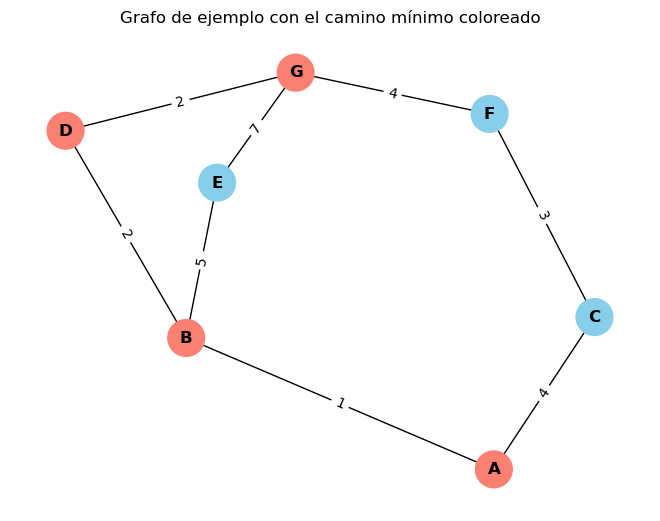

In [18]:
# Obtener los nodos que forman parte del camino mínimo
nodos_camino_minimo = set(camino_minimo)

# Colorear los nodos del grafo según si están en el camino mínimo o no
colors = ['skyblue' if nodo not in nodos_camino_minimo else 'salmon' for nodo in G.nodes()]

# Dibujar el grafo
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=700, node_color=colors, font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Grafo de ejemplo con el camino mínimo coloreado')
plt.show()
